### MALE FEMALE BIASES CALCULATION


### import necessariy modules


In [1]:
import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words
from word_sets_urdu import MALE_WORDS_URDU, FEMALE_WORDS_URDU, PROFESSIONAL_OCCUPATIONS_URDU, PROFESSIONAL_OCCUPATIONS_ENGLISH
from plot_utils import get_association_subplot, get_bias_plot, get_correlation_heatmap

### load male, female & professional occupation wordlist

In [2]:
target_groups = [PROFESSIONAL_OCCUPATIONS_URDU]
target_group_labels = ['professional_occupation']

reference_groups = [MALE_WORDS_URDU, FEMALE_WORDS_URDU]
reference_group_labels = ['male', 'female']

print('target group -->')
for group, labels in zip(target_groups, target_group_labels):
    print(labels, group)

print('reference group -->')
for group, labels in zip(reference_groups, reference_group_labels):
    print(labels, group)



b2e_dict = populate_b2e_dict_for_words(PROFESSIONAL_OCCUPATIONS_URDU, PROFESSIONAL_OCCUPATIONS_ENGLISH)


target group -->
professional_occupation ['شماریات دان', 'فوٹوگرافر', 'ایتھلیٹ', 'ڈانسر', 'ہاؤس کیپر', 'اکاؤنٹنٹ', 'فزیشن', 'ویور', 'بڑھئی', 'ماہر نفسیات', 'نگراں', 'ریاضی دان', 'سرویئر', 'درزی', 'ڈیزائنر', 'معاشی ماہر', 'مزدور', 'بروکر', 'لائبریرین', 'موسیقار', 'پورٹر', 'سائنسدان', 'معمار', 'آپریٹر', 'سرجن', 'ڈرائیور', 'کنڈکٹر', 'نرس', 'کک', 'انجینئر', 'وکیل', 'کسان', 'کلرک', 'منیجر', 'آرٹسٹ', 'پولیس', 'ڈاکٹر', 'پروفیسر', 'جج', 'اساتذہ', 'مصنف', 'سکریٹری', 'سپاہی', 'ایم پی']
reference group -->
male ['بیٹا', 'بیٹا', 'باپ', 'باپ', 'باپ', 'آدمی', 'لڑکا', 'دادا', 'بھائی', 'چچا', 'چچا', 'بھتیجا']
female ['بیٹی', 'لڑکی', 'ماں', 'ماں', 'عورت', 'لڑکیاں', 'بہن', 'بہن', 'خالہ', 'خالہ', 'بھانجی']


In [3]:
calculate_association_distance = CalculateDistance()
calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)

['../word_embeddings/urdu_embeddings/urduvec_140M_100K_300d.bin']
word شماریات دان not in embedding 
word ہاؤس کیپر not in embedding 
word ماہر نفسیات not in embedding 
word ریاضی دان not in embedding 
word سرویئر not in embedding 
word معاشی ماہر not in embedding 
word ایم پی not in embedding 
word شماریات دان not in embedding 
word ہاؤس کیپر not in embedding 
word ماہر نفسیات not in embedding 
word ریاضی دان not in embedding 
word سرویئر not in embedding 
word معاشی ماہر not in embedding 
word ایم پی not in embedding 


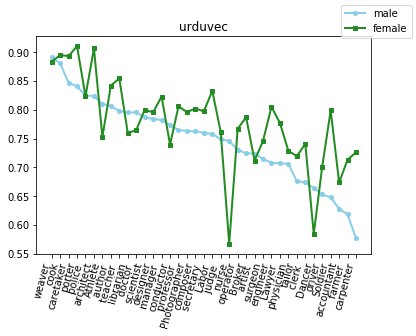

In [4]:
association_dict = {}
model_dir = '../word_embeddings/urdu_embeddings/'
filenames = glob.glob(model_dir + '*bin')

print(filenames)
for filename in filenames:
    newspaper_name = filename.split('/')[-1].split('_')[0]
    target_wise_association_for_this_paper = {}
    model = KeyedVectors.load_word2vec_format(filename, binary=True)
    target_wise_association_for_this_paper = calculate_association_distance.get_association_for_provided_embedding(model=model)
    association_dict[newspaper_name] = target_wise_association_for_this_paper
    
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_paper, b2e_dict = b2e_dict, title= newspaper_name)

# print(association_dict)

### Calculate female bias for all embedding

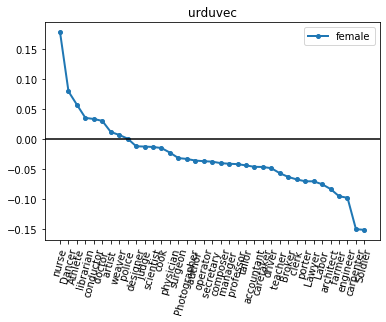

In [5]:
from plot_utils import get_bias_plot
male_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict=association_dict, 
                                                                     target_label = target_group_labels[0], 
                                                                     reference_labels = reference_group_labels)

get_bias_plot(bias_dict=male_bias_dict_for_all_embeddings, b2e_dict=b2e_dict, bias_label = reference_group_labels[1])

In [6]:

import pandas as pd
df = pd.DataFrame.from_dict(male_bias_dict_for_all_embeddings)

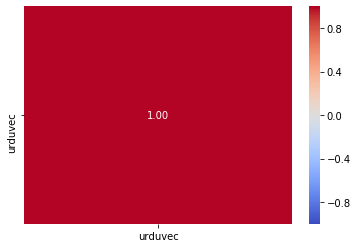

In [7]:
get_correlation_heatmap(df=df)

